# Data Understanding/ Slight Preprocessing

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
dataset=pd.read_csv('nursing_homes.csv')
dataset.shape


(15082, 29)

In [2]:
mean_val=dataset.mean()

C:\Users\ashwi\AppData\Local\Temp/ipykernel_5884/2340698465.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  mean_val=dataset.mean()


In [3]:
dataset['special_focus_status']=dataset['special_focus_status'].fillna(value='No')

In [4]:
dataset=dataset.fillna(value=mean_val)

In [5]:
grouped=dataset.groupby(['provider_state'])
avg=grouped['overall_rating'].mean()
type(avg)

pandas.core.series.Series

Text(0, 0.5, 'Average Rating per state')

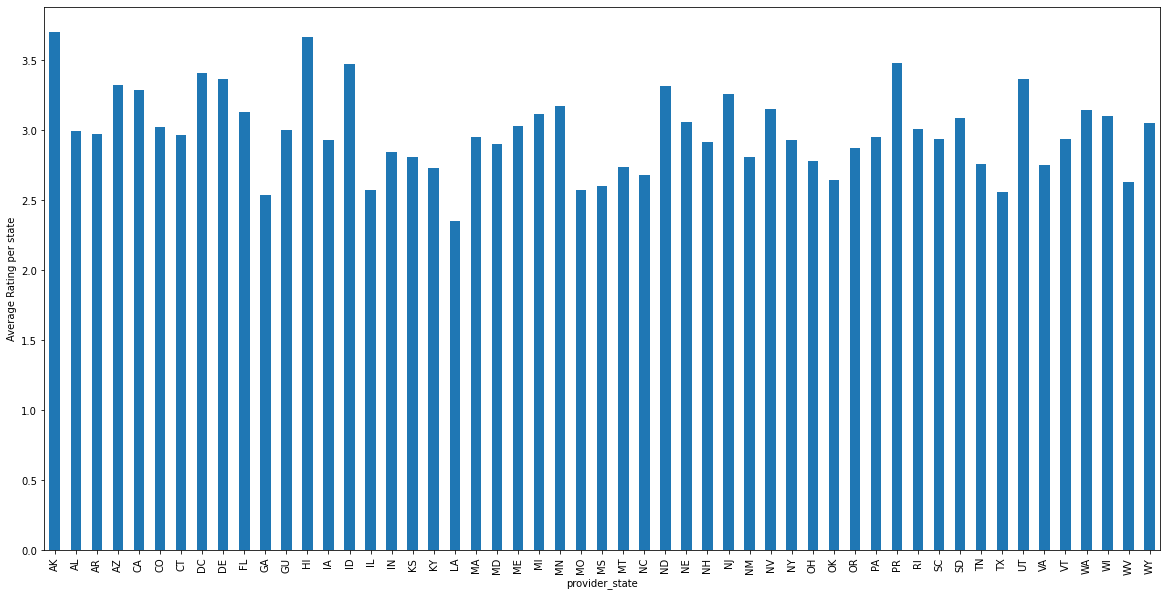

In [6]:
avg.plot(kind='bar',figsize=(20,10))
plt.ylabel("Average Rating per state")

In [7]:
dataset['provider_state'].value_counts()

TX    1201
CA    1174
OH     949
FL     699
IL     698
PA     676
NY     608
IN     522
MO     512
MI     431
IA     425
NC     422
GA     358
MN     354
MA     354
NJ     351
WI     337
KS     316
TN     311
OK     293
VA     289
KY     278
LA     269
AL     225
MD     225
AR     218
CO     218
CT     205
MS     203
WA     199
SC     188
NE     186
AZ     143
OR     129
WV     123
SD      98
UT      98
ME      88
ID      80
ND      78
RI      75
NH      73
MT      70
NM      68
NV      65
HI      43
DE      43
VT      35
WY      35
AK      20
DC      17
PR       6
GU       1
Name: provider_state, dtype: int64

                                     number_of_certified_beds  \
number_of_certified_beds                             1.000000   
average_number_of_residents_per_day                  0.897722   

                                     average_number_of_residents_per_day  
number_of_certified_beds                                        0.897722  
average_number_of_residents_per_day                             1.000000  


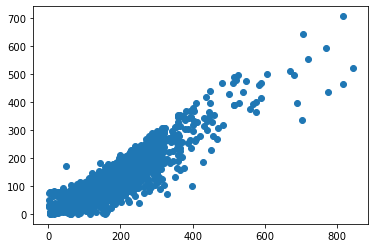

In [8]:
plt.scatter(dataset['number_of_certified_beds'],dataset['average_number_of_residents_per_day'])
subset=dataset[['number_of_certified_beds','average_number_of_residents_per_day']]
print(subset.corr())
plt.show()

In [9]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
dataset['abuse_icon']=le.fit_transform(dataset['abuse_icon'])

Text(0, 0.5, 'Percentage of Homes Labeled with Abuse Icon')

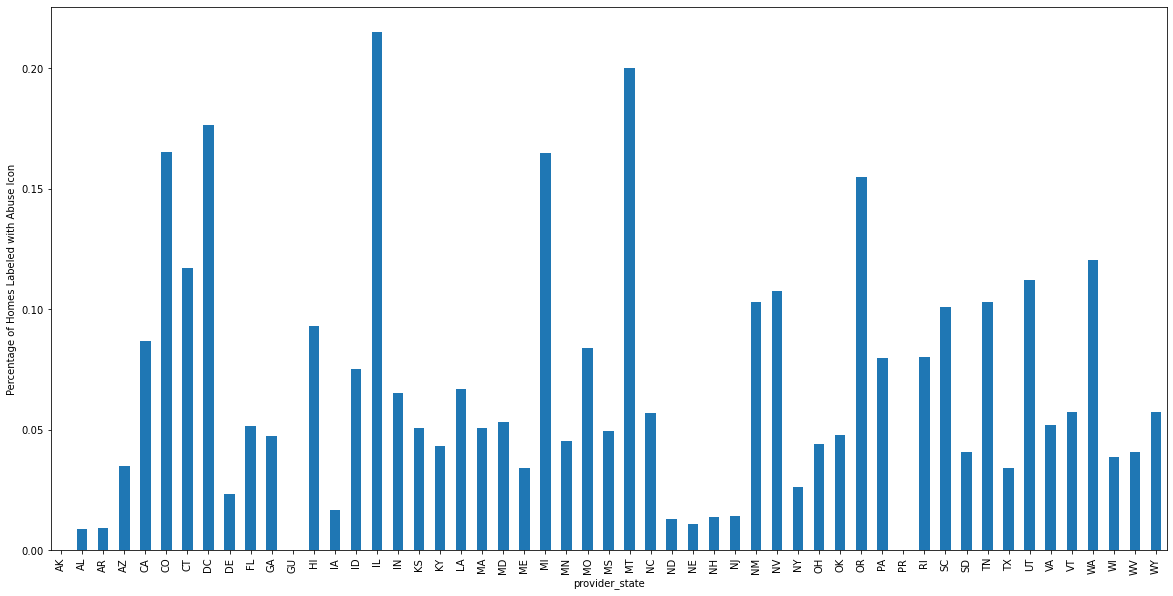

In [10]:
abuse=dataset.groupby(['provider_state']).mean()
abuse['abuse_icon'].plot(kind='bar',figsize=(20,10))
plt.ylabel('Percentage of Homes Labeled with Abuse Icon')

Text(0, 0.5, 'Number of homes')

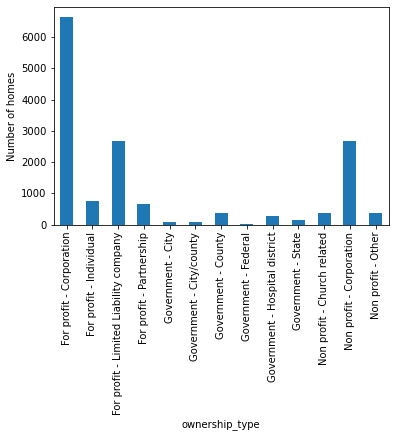

In [11]:
ownership=dataset.groupby('ownership_type')
ownership['ownership_type'].count().plot(kind='bar')
plt.ylabel("Number of homes")

# Finish Preprocessing

In [12]:
reco_system_data=dataset.copy()
reco_system_data.shape

(15082, 29)

In [13]:
reco_system_data=reco_system_data.drop(['provider_state','provider_zip_code','ownership_type','provider_type'],axis=1)
reco_system_data.shape

(15082, 25)

In [14]:
reco_system_data.head(5)

,provider_name,number_of_certified_beds,average_number_of_residents_per_day,provider_resides_in_hospital,continuing_care_retirement_community,special_focus_status,abuse_icon,most_recent_health_inspection_more_than_2_years_ago,with_a_resident_and_family_council,automatic_sprinkler_systems_in_all_required_areas,...,reported_licensed_staffing_hours_per_resident_per_day,reported_total_nurse_staffing_hours_per_resident_per_day,registered_nurse_hours_per_resident_per_day_on_the_weekend,number_of_administrators_who_have_left_the_nursing_home,number_of_facility_reported_incidents,number_of_substantiated_complaints,number_of_citations_from_infection_control_inspections,number_of_fines,number_of_payment_denials,total_number_of_penalties
0,"BURNS NURSING HOME, INC.",57,53.8,N,N,No,0,Y,Both,Yes,...,1.534099,3.751303,0.447687,0.795204,0,0,0.0,1,0,1
1,COOSA VALLEY HEALTHCARE CENTER,85,77.8,N,N,No,0,N,Resident,Yes,...,1.674840,4.249370,0.463990,0.795204,0,0,0.0,1,0,1
2,HIGHLANDS HEALTH AND REHAB,50,36.1,N,N,No,0,N,Resident,Yes,...,2.001370,4.697610,0.494640,0.795204,0,0,0.0,0,0,0
3,EASTVIEW REHABILITATION & HEALTHCARE CENTER,92,73.3,N,N,No,0,Y,Both,Yes,...,1.014140,2.365710,0.439390,0.795204,0,0,0.0,0,0,0
4,PLANTATION MANOR NURSING HOME,103,84.6,N,N,No,0,Y,Resident,Yes,...,1.097920,3.224090,0.145520,1.000000,0,2,0.0,2,0,2


In [15]:
reco_system_data.shape

(15082, 25)

In [16]:
i=LabelEncoder()
reco_system_data['provider_resides_in_hospital']=i.fit_transform(reco_system_data['provider_resides_in_hospital'])

In [17]:
reco_system_data['continuing_care_retirement_community']=i.fit_transform(reco_system_data['continuing_care_retirement_community'])
reco_system_data['special_focus_status']=i.fit_transform(reco_system_data['special_focus_status'])
reco_system_data['most_recent_health_inspection_more_than_2_years_ago']=i.fit_transform(reco_system_data['most_recent_health_inspection_more_than_2_years_ago'])
reco_system_data['with_a_resident_and_family_council']=i.fit_transform(reco_system_data['with_a_resident_and_family_council'])

In [18]:
reco_system_data['automatic_sprinkler_systems_in_all_required_areas']=i.fit_transform(reco_system_data['automatic_sprinkler_systems_in_all_required_areas'])

In [19]:
addon=reco_system_data['overall_rating'].copy()
reco_system_data=reco_system_data.drop('overall_rating',axis=1)
reco_system_data['overall_rating']=addon


In [20]:
reco_system_data.head(5)

,provider_name,number_of_certified_beds,average_number_of_residents_per_day,provider_resides_in_hospital,continuing_care_retirement_community,special_focus_status,abuse_icon,most_recent_health_inspection_more_than_2_years_ago,with_a_resident_and_family_council,automatic_sprinkler_systems_in_all_required_areas,...,reported_total_nurse_staffing_hours_per_resident_per_day,registered_nurse_hours_per_resident_per_day_on_the_weekend,number_of_administrators_who_have_left_the_nursing_home,number_of_facility_reported_incidents,number_of_substantiated_complaints,number_of_citations_from_infection_control_inspections,number_of_fines,number_of_payment_denials,total_number_of_penalties,overall_rating
0,"BURNS NURSING HOME, INC.",57,53.8,0,0,0,0,1,0,2,...,3.751303,0.447687,0.795204,0,0,0.0,1,0,1,5.0
1,COOSA VALLEY HEALTHCARE CENTER,85,77.8,0,0,0,0,0,3,2,...,4.249370,0.463990,0.795204,0,0,0.0,1,0,1,4.0
2,HIGHLANDS HEALTH AND REHAB,50,36.1,0,0,0,0,0,3,2,...,4.697610,0.494640,0.795204,0,0,0.0,0,0,0,5.0
3,EASTVIEW REHABILITATION & HEALTHCARE CENTER,92,73.3,0,0,0,0,1,0,2,...,2.365710,0.439390,0.795204,0,0,0.0,0,0,0,3.0
4,PLANTATION MANOR NURSING HOME,103,84.6,0,0,0,0,1,3,2,...,3.224090,0.145520,1.000000,0,2,0.0,2,0,2,2.0


In [21]:
from sklearn.model_selection import train_test_split
X=reco_system_data.values[:,:-1]
Y=reco_system_data.values[:,-1]
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.20,random_state=0)

In [22]:
nearest_neighbors_name=x_train[:,0]
x_train=np.delete(x_train,0,axis=1)
x_test=np.delete(x_test,0,axis=1)

In [23]:
nearest_neighbors_name

array(["ODD FELLOWS & REBEKAHS' HOME OF MAINE", 'KOESTER PAVILION',
       'CARLTON AT THE LAKE, THE', ..., 'ARBORS AT MINERVA',
       'MILTON FREEWATER HEALTH AND REHABILITATION CENTER',
       'WESTMINSTER COMMONS'], dtype=object)

<AxesSubplot:>

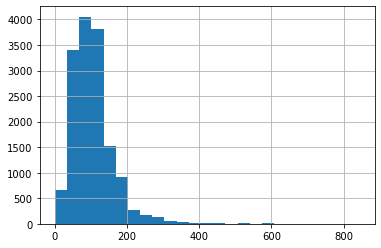

In [24]:
dataset['number_of_certified_beds'].hist(bins=25)

<AxesSubplot:>

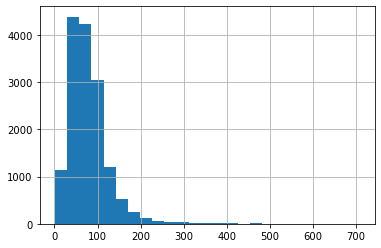

In [25]:
dataset['average_number_of_residents_per_day'].hist(bins=25)

In [26]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x_train=sc.fit_transform(x_train)
x_test=sc.transform(x_test)

In [27]:
print(x_train.shape)

(12065, 23)


In [28]:
reco_system_data.head(5)

,provider_name,number_of_certified_beds,average_number_of_residents_per_day,provider_resides_in_hospital,continuing_care_retirement_community,special_focus_status,abuse_icon,most_recent_health_inspection_more_than_2_years_ago,with_a_resident_and_family_council,automatic_sprinkler_systems_in_all_required_areas,...,reported_total_nurse_staffing_hours_per_resident_per_day,registered_nurse_hours_per_resident_per_day_on_the_weekend,number_of_administrators_who_have_left_the_nursing_home,number_of_facility_reported_incidents,number_of_substantiated_complaints,number_of_citations_from_infection_control_inspections,number_of_fines,number_of_payment_denials,total_number_of_penalties,overall_rating
0,"BURNS NURSING HOME, INC.",57,53.8,0,0,0,0,1,0,2,...,3.751303,0.447687,0.795204,0,0,0.0,1,0,1,5.0
1,COOSA VALLEY HEALTHCARE CENTER,85,77.8,0,0,0,0,0,3,2,...,4.249370,0.463990,0.795204,0,0,0.0,1,0,1,4.0
2,HIGHLANDS HEALTH AND REHAB,50,36.1,0,0,0,0,0,3,2,...,4.697610,0.494640,0.795204,0,0,0.0,0,0,0,5.0
3,EASTVIEW REHABILITATION & HEALTHCARE CENTER,92,73.3,0,0,0,0,1,0,2,...,2.365710,0.439390,0.795204,0,0,0.0,0,0,0,3.0
4,PLANTATION MANOR NURSING HOME,103,84.6,0,0,0,0,1,3,2,...,3.224090,0.145520,1.000000,0,2,0.0,2,0,2,2.0


# User Based System

In [29]:

from sklearn.neighbors import KNeighborsRegressor

# Creating and training the KNN model
n_neighbors =5
knn = KNeighborsRegressor(n_neighbors=n_neighbors)
knn.fit(x_train, y_train)

# Finding the n nearest neighbors for each test data point
distances, indices = knn.kneighbors(x_test)
#each gives 2-D array of distances or indices per test point

# At last Getting the actual data points (nursing home names) of the nearest neighbors
nearest_neighbors_data = nearest_neighbors_name[indices]
#2-D array as well
# Print the nearest neighbors' data and their corresponding distances for each test data point

for i in range(len(x_test)):
    print(f"Test data point {i + 1}:")
    print("Nearest Neighbors:")
    for j in range(n_neighbors):
        print(f"{j + 1}. {nearest_neighbors_data[i, j]} (Distance: {distances[i, j]:.2f})")
    print()

Test data point 1:
Nearest Neighbors:
1. GLEN RIDGE NURSING CARE CENTER (Distance: 3.58)
2. AVAMERE HEALTH SERVICES OF ROGUE VALLEY (Distance: 3.60)
3. APOPKA HEALTH AND REHABILITATION CENTER (Distance: 3.61)
4. MONTICELLO CARE CENTER (Distance: 3.76)
5. PARKWAY HEALTH AND REHABILITATION CENTER (Distance: 3.76)

Test data point 2:
Nearest Neighbors:
1. NEW VISTA POST- ACUTE CARE CENTER (Distance: 1.14)
2. LEISURE GLEN POST ACUTE CARE CENTER (Distance: 1.15)
3. RIVIERA PALMS REHABILITATION CENTER (Distance: 1.25)
4. CALIFORNIA POST-ACUTE CARE (Distance: 1.30)
5. STERLING OAKS REHABILITATION (Distance: 1.35)

Test data point 3:
Nearest Neighbors:
1. PARK BEND HEALTH CENTER (Distance: 0.98)
2. LIBERTY HEALTH CARE CENTER INC (Distance: 1.14)
3. PEACE HEALTHCARE AT MOUNTAIN CITY (Distance: 1.19)
4. GEM CITY HEALTHCARE AND REHABILITATION CENTER (Distance: 1.21)
5. REGENCY CARE OF SILVER SPRING, LLC (Distance: 1.25)

Test data point 4:
Nearest Neighbors:
1. SPRUCE MANOR NURSING & REHABILITATI

3. HOMEWOOD AT MARTINSBURG PA INC (Distance: 2.20)
4. PARAMOUNT NURSING AND REHAB AT FAYETTEVILLE, LLC (Distance: 2.24)
5. SPRINGDALE VILLAGE HEALTHCARE (Distance: 2.25)

Test data point 388:
Nearest Neighbors:
1. ST FRANCIS REHABILITATION & NURSING CENTER (Distance: 1.37)
2. SHOAL CREEK REHABILITATION CENTER (Distance: 1.57)
3. CANDLEWOOD VALLEY HEALTH & REHABILITATION CENTER (Distance: 1.71)
4. PUGET SOUND HEALTHCARE CENTER (Distance: 1.73)
5. MEDILODGE OF ALPENA (Distance: 1.79)

Test data point 389:
Nearest Neighbors:
1. QUIET OAKS HEALTH CARE CENTER (Distance: 1.35)
2. ACCURA HEALTHCARE OF LE MARS (Distance: 1.37)
3. GOOD SAMARITAN SOCIETY - HUTCHINSON VILLAGE (Distance: 1.52)
4. VAIDEN COMMUNITY LIVING CENTER (Distance: 1.54)
5. TOWNE SQUARE CARE OF PURYEAR (Distance: 1.56)

Test data point 390:
Nearest Neighbors:
1. JEFFERSON NURSING AND REHABILITATION CENTER (Distance: 1.11)
2. BELMONT LODGE HEALTHCARE CENTER (Distance: 1.43)
3. HARBOUR MANOR HEALTH & LIVING COMMUNITY (Distance

5. DOVE HEALTHCARE-WEST (Distance: 1.38)

Test data point 704:
Nearest Neighbors:
1. SUPERIOR HEALTH & REHAB, LLC (Distance: 1.22)
2. SUMMIT REHABILITATION AND CARE COMMUNITY (Distance: 1.26)
3. HIGHLANDS HEALTHCARE AND REHABILITATION CENTER (Distance: 1.31)
4. LIFE CARE CENTER OF JEFFERSON CITY (Distance: 1.31)
5. MEADOW GROVE TRANSITIONAL CARE (Distance: 1.37)

Test data point 705:
Nearest Neighbors:
1. WARREN SKILLED NURSING AND REHABILITATION (Distance: 1.21)
2. LIFE CARE CENTER OF SALT LAKE CITY (Distance: 1.34)
3. LIFE CARE CENTER OF STONEHAM (Distance: 1.40)
4. SARATOGA CARE CENTER LLC (Distance: 1.43)
5. LIFE CARE CENTER OF EVERGREEN (Distance: 1.44)

Test data point 706:
Nearest Neighbors:
1. PLEASANT VIEW HEALTHCARE CENTER (Distance: 2.32)
2. WAGONER HEALTH & REHAB (Distance: 2.56)
3. DIVERSICARE OF QUITMAN (Distance: 2.64)
4. TRINIDAD REHABILITATION AND HEALTHCARE CENTER (Distance: 2.67)
5. RIDGEWOOD TERRACE NURSING HOME (Distance: 2.78)

Test data point 707:
Nearest Neighbo

5. GOLDEN AGE NURSING HOME (Distance: 2.38)

Test data point 1080:
Nearest Neighbors:
1. NORTHFIELD VILLAGE RETIREMENT COMMUNITY (Distance: 1.57)
2. PRAIRIE GROVE HEALTH AND REHABILITATION, LLC (Distance: 1.58)
3. PRAIRIE VILLAGE NURSING AND REHABILITATION (Distance: 1.60)
4. SIGNATURE HEALTHCARE OF GEORGETOWN (Distance: 1.72)
5. GOOD SAMARITAN SOCIETY SHAKAMAK RETIREMENT COMM (Distance: 1.82)

Test data point 1081:
Nearest Neighbors:
1. ARTHUR HOME, THE (Distance: 1.14)
2. PRUITTHEALTH - OCILLA (Distance: 1.19)
3. PONTOTOC HEALTH & REHAB CENTER (Distance: 1.43)
4. LAKEWOOD THERAPY AND LIVING CENTER (Distance: 1.48)
5. COPIAH LIVING CENTER (Distance: 1.49)

Test data point 1082:
Nearest Neighbors:
1. TERRACE VIEW GARDENS (Distance: 1.07)
2. SANCTUARY POINTE NURSING & REHABILITATION CENTER (Distance: 1.15)
3. KEYSTONE POINTE HEALTH AND REHABILITATION (Distance: 1.20)
4. LEWISTON TRANSITIONAL CARE OF CASCADIA (Distance: 1.23)
5. PEAK HEALTHCARE AT SLIGO CREEK (Distance: 1.25)

Test data 

Test data point 1337:
Nearest Neighbors:
1. ROLLING MEADOWS HEALTH CARE CENTER (Distance: 0.81)
2. JEFFERSON HILLS HEALTHCARE AND REHABILITATION CENT (Distance: 0.94)
3. SOUTHPOINTE HEALTHCARE CENTER (Distance: 0.95)
4. RAWLINS HOUSE HEALTH & LIVING COMMUNITY (Distance: 0.96)
5. LEONARD FLORENCE CENTER FOR LIVING (Distance: 1.01)

Test data point 1338:
Nearest Neighbors:
1. GREEN HOUSE LIVING FOR SHERIDAN (Distance: 2.12)
2. BRENTWOOD HEALTH CARE CENTER (Distance: 2.18)
3. CHOWCHILLA MEMORIAL HEALTHCARE DISTRICT (Distance: 2.23)
4. MARQUIS WILSONVILLE POST ACUTE REHAB (Distance: 2.26)
5. BALDWIN GARDENS NURSING CENTER (Distance: 2.34)

Test data point 1339:
Nearest Neighbors:
1. CIRCLEVILLE POST-ACUTE (Distance: 0.89)
2. ROLLING HILLS HEALTHCARE (Distance: 1.06)
3. BROOKE KNOLL VILLAGE (Distance: 1.13)
4. WARRENSBURG MANOR CARE CENTER (Distance: 1.18)
5. MEADOW WIND HEALTH CARE CENTER (Distance: 1.19)

Test data point 1340:
Nearest Neighbors:
1. FUTURE CARE CHESAPEAKE (Distance: 2.06)


Test data point 1695:
Nearest Neighbors:
1. PRESBYTERIAN HOME OF SC - FOOTHILLS (Distance: 1.43)
2. THE ARBORETUM AT THE WOODLANDS (Distance: 1.52)
3. MRC THE CROSSINGS (Distance: 1.57)
4. HIGHLAND FARMS (Distance: 1.61)
5. ROSECREST REHABILITATION AND HEALTHCARE CENTER (Distance: 1.63)

Test data point 1696:
Nearest Neighbors:
1. ST JAMES NURSING CENTER (Distance: 2.91)
2. BELLEVILLE HEALTHCARE CENTER (Distance: 3.32)
3. RIVER CROSSING OF EDWARDSVILLE (Distance: 3.66)
4. WILLOW VALLEY CENTER FOR NURSING AND REHAB (Distance: 3.79)
5. BRYAN HEALTHCARE AND REHABILITATION (Distance: 3.86)

Test data point 1697:
Nearest Neighbors:
1. OAKVIEW NURSING AND REHABILITATION (Distance: 1.77)
2. NATURE TRAIL HEALTH AND REHAB (Distance: 1.82)
3. WINFIELD REST HAVEN II, LLC (Distance: 1.96)
4. CANTON OAKS (Distance: 1.97)
5. MONTGOMERY PLACE NURSING CENTER (Distance: 2.01)

Test data point 1698:
Nearest Neighbors:
1. SLATON CARE CENTER (Distance: 0.72)
2. IRVING NURSING AND REHABILITATION (Distance:

Nearest Neighbors:
1. MEADOWBROOK SKLD NSG & REHAB (Distance: 2.00)
2. SUMMERS NURSING AND REHABILITATION CENTER (Distance: 2.24)
3. ELMS OF CRANBURY, THE (Distance: 2.27)
4. SOUTH ROANOKE NURSING AND REHABILITATION (Distance: 2.36)
5. OSPREY POINT NURSING CENTER (Distance: 2.41)

Test data point 2079:
Nearest Neighbors:
1. NORTHERN CARDINAL REHABILITATION AND NURSING (Distance: 1.31)
2. VILLAGE CARE CENTER (Distance: 1.55)
3. UTICA REHABILITATION & NURSING CENTER (Distance: 1.63)
4. GRANT HEALTHCARE AND REHABILITATION (Distance: 1.73)
5. SIGNATURE HEALTHCARE AT JEFFERSON MANOR REHAB & WE (Distance: 1.79)

Test data point 2080:
Nearest Neighbors:
1. CHESWICK REHABILITATION AND WELLNESS CENTER, LLC (Distance: 1.22)
2. THE MANOR OF FARMINGTON HILLS (Distance: 1.66)
3. UNIVERSAL HEALTH CARE/FLETCHER (Distance: 1.70)
4. MANOR AT ST LUKE VILLAGE,THE (Distance: 1.96)
5. BRICKYARD HEALTHCARE - LINCOLN HILLS CARE CENTER (Distance: 1.96)

Test data point 2081:
Nearest Neighbors:
1. WESLEY ENHAN


Test data point 2447:
Nearest Neighbors:
1. ELDERWOOD AT HORNELL (Distance: 0.79)
2. ZACHARY MANOR NURSING AND REHABILITATION CENTER (Distance: 0.95)
3. CORPUS CHRISTI NURSING AND REHABILITATION CENTER (Distance: 0.98)
4. LODGE AT TANGI PINES (THE) (Distance: 1.00)
5. THE OAKS CARE CENTER (Distance: 1.01)

Test data point 2448:
Nearest Neighbors:
1. SHAWNEE ROSE CARE CENTER (Distance: 1.16)
2. VINCENTIAN DE MARILLAC (Distance: 1.20)
3. GILL ODD FELLOWS HOME OF VERMONT (Distance: 1.37)
4. ADVINIA CARE AT VENICE (Distance: 1.38)
5. SAVANNAH COVE (Distance: 1.45)

Test data point 2449:
Nearest Neighbors:
1. GENERATIONS OF VERNON, LLC (Distance: 1.25)
2. PENDLETON REHABILITATION AND NURSING CENTER (Distance: 1.36)
3. PILGRIM REHABILITATION & SKILLED NURSING CENTER (Distance: 1.37)
4. AURORA HEALTH AND REHABILITATION (Distance: 1.38)
5. GARDEN TERRACE ALZHEIMER'S CENTER OF EXCELLENCE (Distance: 1.39)

Test data point 2450:
Nearest Neighbors:
1. ST PAUL'S SENIOR COMMUNITY (Distance: 1.98)
2

3. OKEMAH CARE CENTER (Distance: 1.39)
4. NORWALK NURSING AND REHABILITATION CENTER (Distance: 1.49)
5. BEAUMONT REHAB & SKILLED NURSING CTR - NATICK (Distance: 1.58)

Test data point 2826:
Nearest Neighbors:
1. MOUNT OLIVE CENTER (Distance: 3.76)
2. JUDSON CARE CENTER, INC (Distance: 4.52)
3. KINGSTON REHABILITATION AND NURSING CENTER (Distance: 4.54)
4. APERION CARE PEORIA HEIGHTS (Distance: 4.64)
5. CASEYVILLE NURSING & REHAB CTR (Distance: 4.65)

Test data point 2827:
Nearest Neighbors:
1. ROYAL MEGANSETT NURSING & REHABILITATION (Distance: 3.23)
2. LIBERTY RETIREMENT COMMUNITY OF LIMA INC (Distance: 3.27)
3. VIERRA FALLS CHURCH (Distance: 3.53)
4. FUTURE CARE CAPITAL REGION (Distance: 3.58)
5. LAUREL SQUARE HEALTHCARE AND REHABILITATION CENTER (Distance: 3.68)

Test data point 2828:
Nearest Neighbors:
1. KENTON NURSING AND REHABILITATION CENTER (Distance: 2.04)
2. REHABILITATION CENTER OF SOUTH GEORGIA (Distance: 2.26)
3. FAYETTE HEALTH AND REHABILITATION CENTER (Distance: 2.48)
4

In [30]:
import numpy as np
from sklearn.neighbors import NearestNeighbors
from scipy.stats import pearsonr


# First Finding the n nearest neighbors for each test data point
distances, indices = knn.kneighbors(x_test)

# Then Getting the actual data points (nursing home names) of the nearest neighbors
nearest_neighbors_data = nearest_neighbors_name[indices]

# Calculating the Pearson correlation coefficients between each neighbor and test point
pearson_correlations = np.zeros((x_test.shape[0], n_neighbors))

for i in range(x_test.shape[0]):
    for j in range(n_neighbors):
        pearson_correlations[i, j], _ = pearsonr(x_test[i], x_train[indices[i, j]])

# Printing the nearest neighbors' data, distances, and Pearson correlation coefficients for each test data point
for i in range(len(x_test)):
    print(f"Test data point {i + 1}:")
    print("Nearest Neighbors:")
    for j in range(n_neighbors):
        print(f"{j + 1}. {nearest_neighbors_data[i, j]} (Distance: {distances[i, j]:.2f}, Pearson correlation: {pearson_correlations[i, j]:.2f})")
    print()


Test data point 1:
Nearest Neighbors:
1. GLEN RIDGE NURSING CARE CENTER (Distance: 3.58, Pearson correlation: 0.90)
2. AVAMERE HEALTH SERVICES OF ROGUE VALLEY (Distance: 3.60, Pearson correlation: 0.89)
3. APOPKA HEALTH AND REHABILITATION CENTER (Distance: 3.61, Pearson correlation: 0.89)
4. MONTICELLO CARE CENTER (Distance: 3.76, Pearson correlation: 0.91)
5. PARKWAY HEALTH AND REHABILITATION CENTER (Distance: 3.76, Pearson correlation: 0.90)

Test data point 2:
Nearest Neighbors:
1. NEW VISTA POST- ACUTE CARE CENTER (Distance: 1.14, Pearson correlation: 0.88)
2. LEISURE GLEN POST ACUTE CARE CENTER (Distance: 1.15, Pearson correlation: 0.84)
3. RIVIERA PALMS REHABILITATION CENTER (Distance: 1.25, Pearson correlation: 0.86)
4. CALIFORNIA POST-ACUTE CARE (Distance: 1.30, Pearson correlation: 0.89)
5. STERLING OAKS REHABILITATION (Distance: 1.35, Pearson correlation: 0.86)

Test data point 3:
Nearest Neighbors:
1. PARK BEND HEALTH CENTER (Distance: 0.98, Pearson correlation: 0.96)
2. LIB

Test data point 267:
Nearest Neighbors:
1. CRESTON SPECIALTY CARE (Distance: 1.71, Pearson correlation: 0.84)
2. SCIOTO POINTE (Distance: 1.80, Pearson correlation: 0.86)
3. ABBINGTON VLGE NRSG & RHB CTR (Distance: 1.88, Pearson correlation: 0.84)
4. PRUITTHEALTH - LAFAYETTE (Distance: 1.89, Pearson correlation: 0.84)
5. FAITH COMMUNITY NURSING & REHABILITATION (Distance: 1.90, Pearson correlation: 0.83)

Test data point 268:
Nearest Neighbors:
1. HELIA SOUTHBELT HEALTHCARE (Distance: 1.76, Pearson correlation: 0.93)
2. CITADEL ELIZABETH CITY LLC (Distance: 1.89, Pearson correlation: 0.92)
3. BAY AT WATERS EDGE HEALTH AND REHABILITATION (THE) (Distance: 2.03, Pearson correlation: 0.90)
4. FLATROCK RIVER LODGE (Distance: 2.12, Pearson correlation: 0.89)
5. AZRIA HEALTH ASHLAND (Distance: 2.15, Pearson correlation: 0.88)

Test data point 269:
Nearest Neighbors:
1. EMBASSY OF CAMBRIDGE (Distance: 1.92, Pearson correlation: 0.92)
2. ACCORDIUS HEALTH AT CONCORD (Distance: 2.12, Pearson corr

5. MARYLAND BAPTIST AGED HOME (Distance: 1.25, Pearson correlation: 0.90)

Test data point 619:
Nearest Neighbors:
1. RIVERWALK POST ACUTE (Distance: 1.79, Pearson correlation: 0.84)
2. WILLOW SPRINGS REHABILITATION AND HEALTHCARE CTR (Distance: 1.90, Pearson correlation: 0.82)
3. THE COLONNADES AT REFLECTION BAY (Distance: 2.04, Pearson correlation: 0.83)
4. REGENCY AT LANSING WEST (Distance: 2.04, Pearson correlation: 0.80)
5. NORTHWEST HEALTH AND REHABILITATION CENTER (Distance: 2.06, Pearson correlation: 0.79)

Test data point 620:
Nearest Neighbors:
1. WOODLAND CONVALESCENT CENTER (Distance: 1.01, Pearson correlation: 0.93)
2. CRESTVIEW NURSING & RESIDENTIAL LIVING (Distance: 1.33, Pearson correlation: 0.88)
3. ADVINIA CARE AT VENICE (Distance: 1.33, Pearson correlation: 0.88)
4. CISNE REHABILITATION & HEALTH CENTER (Distance: 1.37, Pearson correlation: 0.88)
5. VINCENTIAN DE MARILLAC (Distance: 1.38, Pearson correlation: 0.87)

Test data point 621:
Nearest Neighbors:
1. GRANBY HO

Nearest Neighbors:
1. SHELL LAKE HEALTH CARE CENTER (Distance: 2.03, Pearson correlation: 0.84)
2. SHINNERY OAKS COMMUNITY (Distance: 2.03, Pearson correlation: 0.85)
3. LIFECARE GREENBUSH MANOR (Distance: 2.04, Pearson correlation: 0.85)
4. THE LIVING CENTER (Distance: 2.10, Pearson correlation: 0.84)
5. EMERALD NURSING & REHAB COZAD (Distance: 2.10, Pearson correlation: 0.85)

Test data point 953:
Nearest Neighbors:
1. VALLEY VIEW CARE CENTER (Distance: 2.38, Pearson correlation: 0.78)
2. MEDILODGE OF TAYLOR (Distance: 2.41, Pearson correlation: 0.78)
3. AVANTARA LIBERTYVILLE (Distance: 2.50, Pearson correlation: 0.75)
4. DADE CITY HEALTH AND REHABILITATION CENTER (Distance: 2.55, Pearson correlation: 0.73)
5. EVANSVILLE MANOR NURSING AND REHAB, LLC (Distance: 2.60, Pearson correlation: 0.76)

Test data point 954:
Nearest Neighbors:
1. MEDICALODGES GIRARD (Distance: 1.68, Pearson correlation: 0.90)
2. LAURIE ANN NURSING HOME (Distance: 1.97, Pearson correlation: 0.86)
3. WOODLAND SPR

4. PARKVIEW JULIAN HEALTHCARE CENTER (Distance: 3.62, Pearson correlation: 0.73)
5. MAPLE LAWN NURSING HOME (Distance: 3.64, Pearson correlation: 0.72)

Test data point 1271:
Nearest Neighbors:
1. BRIDGEVILLE REHABILITATION & CARE CENTER (Distance: 1.36, Pearson correlation: 0.92)
2. HARBORVIEW SATILLA (Distance: 1.51, Pearson correlation: 0.89)
3. ROSELANE HEALTH CENTER BY HARBORVIEW (Distance: 1.83, Pearson correlation: 0.88)
4. THE REHAB SUITES AT MAGNOLIA CROSSING (Distance: 1.84, Pearson correlation: 0.85)
5. HERITAGE HALL BIG STONE GAP (Distance: 1.89, Pearson correlation: 0.86)

Test data point 1272:
Nearest Neighbors:
1. AUTUMN LAKE HEALTHCARE AT WAUGH CHAPEL (Distance: 1.31, Pearson correlation: 0.95)
2. SACRAMENTO POST-ACUTE (Distance: 1.53, Pearson correlation: 0.91)
3. STERLING CARE ROCKVILLE NURSING (Distance: 1.80, Pearson correlation: 0.90)
4. HANCOCK HALL (Distance: 1.82, Pearson correlation: 0.87)
5. SHADESCREST HEALTH CARE CENTER (Distance: 1.90, Pearson correlation: 

Nearest Neighbors:
1. HICKORY VLG NRSG & RHB (Distance: 1.55, Pearson correlation: 0.92)
2. SEVILLE CARE CENTER (Distance: 1.95, Pearson correlation: 0.89)
3. JEFF DAVIS LIVING CENTER, LLC (Distance: 2.04, Pearson correlation: 0.86)
4. MIDLAND MEDICAL LODGE (Distance: 2.06, Pearson correlation: 0.87)
5. KNOPP HEALTHCARE AND REHAB CENTER INC (Distance: 2.08, Pearson correlation: 0.86)

Test data point 1688:
Nearest Neighbors:
1. BRENTWOOD HEALTH CARE CENTER (Distance: 0.88, Pearson correlation: 0.88)
2. HUNT NURSING & REHAB CENTER (Distance: 1.03, Pearson correlation: 0.83)
3. GRANITE CREEK HEALTH & REHABILITATION CENTER (Distance: 1.03, Pearson correlation: 0.82)
4. BATAVIA NURSING CARE CENTER (Distance: 1.04, Pearson correlation: 0.83)
5. MANCHESTER CENTER FOR REHABILITATION AND HEALING L (Distance: 1.08, Pearson correlation: 0.86)

Test data point 1689:
Nearest Neighbors:
1. VILLA DEL RIO GARDENS (Distance: 0.77, Pearson correlation: 0.93)
2. PICKAWAY MANOR CARE CENTER (Distance: 0.9

2. NORTERRE (Distance: 2.43, Pearson correlation: 0.87)
3. MAPLE KNOLL VILLAGE (Distance: 2.59, Pearson correlation: 0.86)
4. SANDERS RIDGE HEALTH CAMPUS (Distance: 2.59, Pearson correlation: 0.84)
5. MORADA TEMPLE (Distance: 2.74, Pearson correlation: 0.85)

Test data point 2011:
Nearest Neighbors:
1. PARAMOUNT NURSING AND REHAB AT FAYETTEVILLE, LLC (Distance: 1.30, Pearson correlation: 0.96)
2. RICHBORO REHABILITATION & NURSING CENTER (Distance: 1.54, Pearson correlation: 0.92)
3. COONEY HEALTHCARE AND REHABILITATION (Distance: 1.84, Pearson correlation: 0.89)
4. SPIRITRUST LUTHERAN THE VILLAGE AT SPRENKLE DRIVE (Distance: 1.95, Pearson correlation: 0.87)
5. WAYNESBURG HEALTHCARE AND REHABILITATION CENTER (Distance: 1.97, Pearson correlation: 0.86)

Test data point 2012:
Nearest Neighbors:
1. SKY VIEW NURSING CENTER (Distance: 1.14, Pearson correlation: 0.94)
2. AVERA OAHE MANOR (Distance: 1.29, Pearson correlation: 0.96)
3. THORNTON MANOR NURSING AND CARE CENTER (Distance: 1.35, Pea

1. CAPITOL LAKES HEALTH CENTER (Distance: 1.08, Pearson correlation: 0.98)
2. HICKORY POINT CHRISTIAN VILLAGE (Distance: 1.23, Pearson correlation: 0.97)
3. ABERDEEN VILLAGE (Distance: 1.45, Pearson correlation: 0.97)
4. HEARTHSTONE, THE (Distance: 1.56, Pearson correlation: 0.96)
5. DEERFIELD HEALTH CARE CENTER (Distance: 1.59, Pearson correlation: 0.96)

Test data point 2372:
Nearest Neighbors:
1. SYRACUSE HOME ASSOCIATION (Distance: 1.24, Pearson correlation: 0.96)
2. DEL AMO GARDENS CONVALESCENT (Distance: 1.45, Pearson correlation: 0.93)
3. EDGEWATER AT WATERMAN VILLAGE (Distance: 1.47, Pearson correlation: 0.92)
4. CORTLAND ACRES NURSING HOME (Distance: 1.48, Pearson correlation: 0.93)
5. MONT MARIE REHABILITATION & HEALTHCARE CENTER (Distance: 1.48, Pearson correlation: 0.93)

Test data point 2373:
Nearest Neighbors:
1. MARGARET E. MOUL HOME (Distance: 1.07, Pearson correlation: 0.94)
2. CROSSINGS CARE CENTER (Distance: 1.15, Pearson correlation: 0.93)
3. FIRCREST SCHOOL, PAT N 

2. TRI-CITIES NURSING AND REHABILITATION CENTER (Distance: 1.10, Pearson correlation: 0.96)
3. DIVERSICARE OF TYLERTOWN (Distance: 1.18, Pearson correlation: 0.96)
4. CASTLE MANOR CONVALESCENT CENTER (Distance: 1.33, Pearson correlation: 0.95)
5. PAVILION-THS, LLC (Distance: 1.35, Pearson correlation: 0.93)

Test data point 2706:
Nearest Neighbors:
1. VILLAGE ON THE ISLE (Distance: 0.89, Pearson correlation: 0.99)
2. GLENRIDGE ON PALMER RANCH INC. (Distance: 0.90, Pearson correlation: 0.99)
3. HOMESTEAD VILLAGE, INC (Distance: 1.17, Pearson correlation: 0.97)
4. ABERDEEN VILLAGE (Distance: 1.23, Pearson correlation: 0.97)
5. ACACIA HEALTH CENTER (Distance: 1.31, Pearson correlation: 0.97)

Test data point 2707:
Nearest Neighbors:
1. COMFORT NURSING AND REHABILITATION CENTER (Distance: 1.75, Pearson correlation: 0.90)
2. ROSENBERG HEALTH & REHABILITATION CENTER (Distance: 1.80, Pearson correlation: 0.81)
3. AYDEN HEALTHCARE OF BELLE SPRINGS. (Distance: 1.80, Pearson correlation: 0.82)
4

In [31]:
print(indices)

[[ 5803   709  9943  8895  2608]
 [ 7178  3947  3416 11016 10374]
 [ 5802  3917  6752  3565 10774]
 ...
 [11410  6823  2831  6084 10580]
 [ 2832  1403  2684  1896  1031]
 [ 4384   215  2554   399  9856]]


Predict the rating for each test data

In [32]:
import numpy as np
from sklearn.neighbors import KNeighborsRegressor
from scipy.stats import pearsonr

# Getting Pearson Correlation from previous step
# Then Calculating the weighted average of the nearest neighbors' ratings using Pearson correlation coefficients
predicted_ratings = np.zeros(x_test.shape[0])
for i in range(x_test.shape[0]):
    average=np.mean(x_test[i])
    weighted_sum = 0
    weight_sum = 0
    for j in range(n_neighbors):
        weighted_sum += ((y_train[indices[i, j]]-np.mean(x_train[indices[i,j]])) * pearson_correlations[i, j])
        weight_sum += abs(pearson_correlations[i, j])
    predicted_ratings[i] = round(average+(weighted_sum / weight_sum))

# Print the nearest neighbors' data, distances, Pearson correlation coefficients, and predicted ratings for each test data point



The difference should be no greater than 1 between actual and predicted for it to be a good rating

In [33]:
good_ratings=0
bad_ratings=0
for i in range(0,len(predicted_ratings)):
    if predicted_ratings[i]-y_test[i]<=1 and predicted_ratings[i]-y_test[i]>=-1:
        good_ratings+=1
    else:
        bad_ratings+=1
print(good_ratings/(good_ratings+bad_ratings))

0.9887305270135897


# Item Based System

In [34]:
x_train_item=np.transpose(x_train)
x_train_item.shape

(23, 12065)

In [35]:
#construct similarity between each of the 23 features, and the y train
from sklearn.metrics.pairwise import cosine_similarity
item_similarity=cosine_similarity(x_train_item,[y_train])
print(item_similarity)
item_similarity=item_similarity.reshape(-1)

[[-0.08152481]
 [-0.06206528]
 [ 0.04837137]
 [ 0.07459483]
 [-0.09023372]
 [-0.11235417]
 [ 0.01941583]
 [-0.02101977]
 [ 0.00516858]
 [ 0.38561231]
 [ 0.20501941]
 [ 0.22849828]
 [ 0.13514515]
 [ 0.14233829]
 [ 0.16559482]
 [ 0.13800981]
 [-0.07686718]
 [-0.09037018]
 [-0.16403834]
 [-0.13859364]
 [-0.11642827]
 [-0.12726907]
 [-0.12727   ]]


In [36]:
print(item_similarity)
test=np.copy(item_similarity)

[-0.08152481 -0.06206528  0.04837137  0.07459483 -0.09023372 -0.11235417
  0.01941583 -0.02101977  0.00516858  0.38561231  0.20501941  0.22849828
  0.13514515  0.14233829  0.16559482  0.13800981 -0.07686718 -0.09037018
 -0.16403834 -0.13859364 -0.11642827 -0.12726907 -0.12727   ]


In [37]:
#get the n greatest item similarities
n_parameter=1
test.sort()
print(test)
n_greatest=test[-n_parameter:]
    

[-0.16403834 -0.13859364 -0.12727    -0.12726907 -0.11642827 -0.11235417
 -0.09037018 -0.09023372 -0.08152481 -0.07686718 -0.06206528 -0.02101977
  0.00516858  0.01941583  0.04837137  0.07459483  0.13514515  0.13800981
  0.14233829  0.16559482  0.20501941  0.22849828  0.38561231]


In [38]:
#Now we find the indices of these item similarities
n_greatest_indices=[]
for i in range(n_parameter):
    for j in range(23):
        if item_similarity[j]==n_greatest[i]:
            n_greatest_indices.append(j)
n_greatest_indices=np.array(n_greatest_indices).reshape(-1)
print(n_greatest_indices)
print(n_greatest)

[9]
[0.38561231]


In [39]:
#For each sample, conduct a predicted rating using similarities from above cells
predictions=[]
x_test_item=sc.inverse_transform(x_test)
denominator=0
for k in range(n_parameter):
    denominator+=n_greatest[k]
 
  # i= current user, cur= n greatest similarity feature rating by user i
for i in range(2085):
    numerator=0
    for j in range(n_parameter):
        cur=n_greatest_indices[j]
        numerator+= (n_greatest[j] * x_test_item[i,cur])
    predictions.append(round(numerator/denominator))

In [40]:
predictions=np.array(predictions).reshape(-1)

In [41]:
good_ratings=0
bad_ratings=0
for i in range(0,len(predictions)):
    if predictions[i]-y_test[i]<=1 and predictions[i]-y_test[i]>=-1:
        good_ratings+=1
    else:
        bad_ratings+=1
print(good_ratings/(good_ratings+bad_ratings))

0.9803357314148681


# Best System: User Based With n_neighbors=5

# Insights

# Goal: Try to find features graphically that might have influenced our system to give a rating that it did

In [42]:
graph_indexes=[]
samples=3017

In [43]:
print(len(graph_indexes))

0


In [43]:
#Find 2 samples that had a predicted rating of 1,3, and 5. Add their indices in the list
#must make sure the ratings are accurate as well
iterations=0
for b in range(0,samples):
    iterations+=1
    if len(graph_indexes)==3:
        break
    if predicted_ratings[b]==1 and y_test[b]==1:
        graph_indexes.append(b)
print("This for loops took " + str(iterations) + " iterations")        
 
    
iterations=0
for c in range(0,samples):
    iterations+=1
    if len(graph_indexes)==6:
        break
    if predicted_ratings[c]==5 and y_test[c]==5:
        graph_indexes.append(c)
print("This for loops took " + str(iterations) + " iterations")        


iterations=0
for d in range(0,samples):
    iterations+=1
    if len(graph_indexes)==9:
        break
    if predicted_ratings[d]==3 and y_test[d]==3:
        graph_indexes.append(d)
print("This for loops took " + str(iterations) + " iterations")



print(graph_indexes)


This for loops took 19 iterations
This for loops took 12 iterations
This for loops took 13 iterations
[0, 9, 17, 5, 7, 10, 2, 8, 11]


Not bad of a runtime doing 3 for loops

In [44]:
columns=range(23)

C:\Users\ashwi\AppData\Local\Temp/ipykernel_5884/3988672942.py:6: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


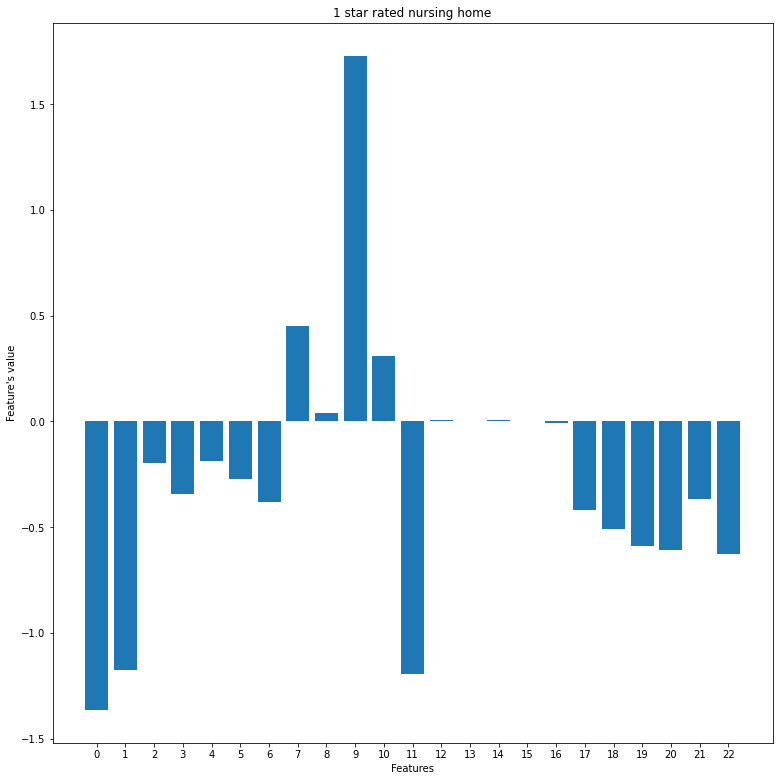

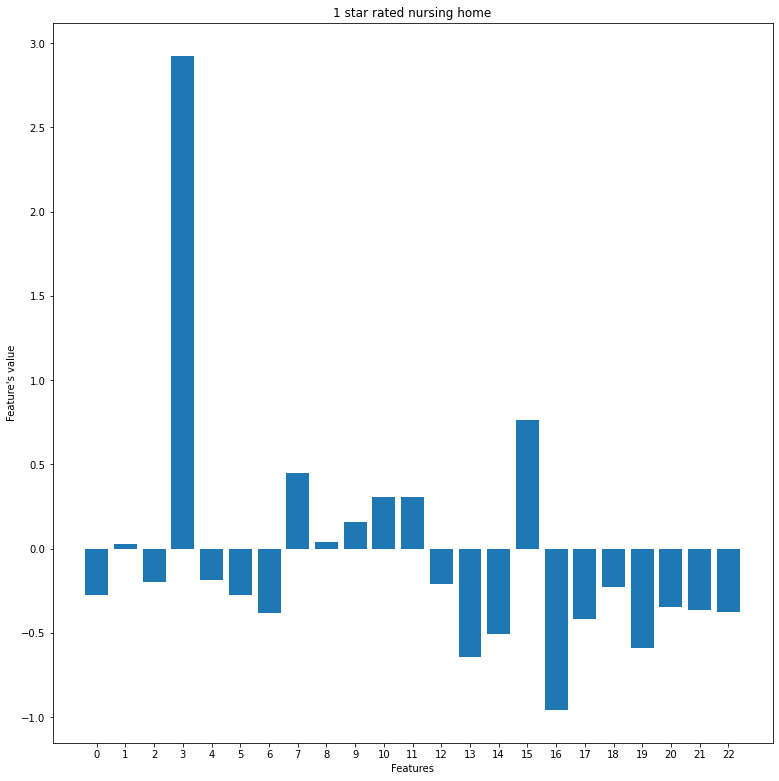

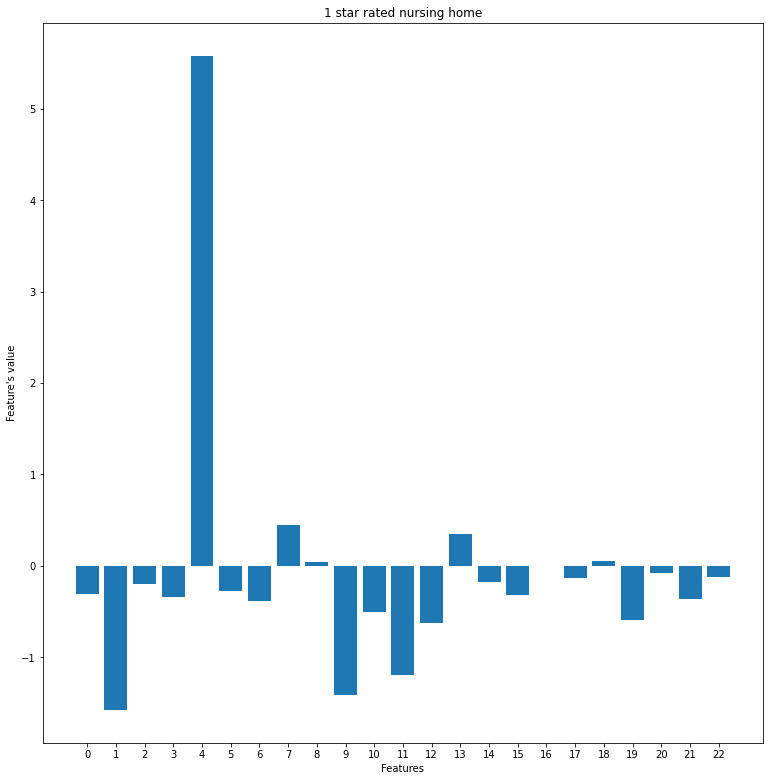

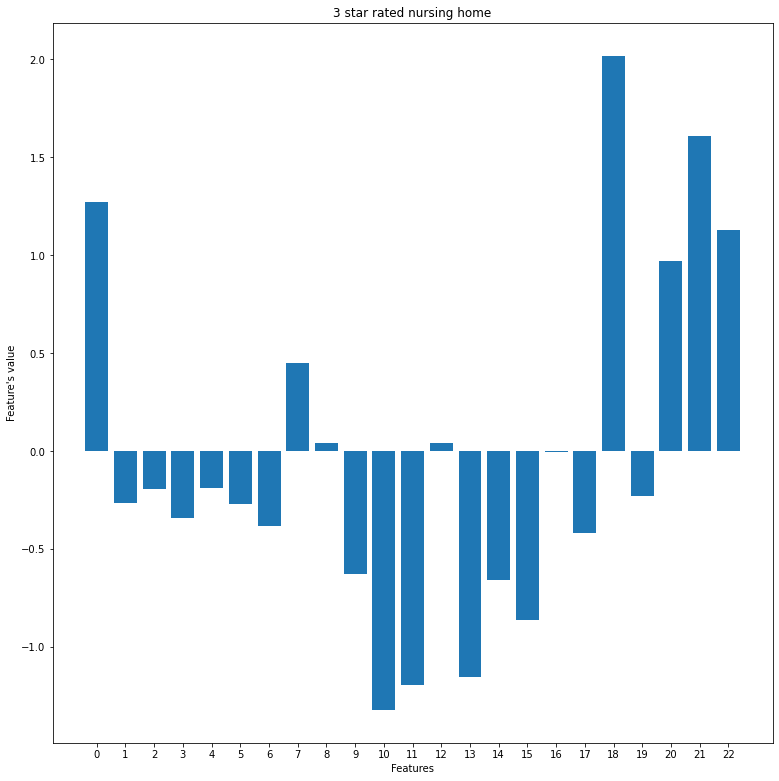

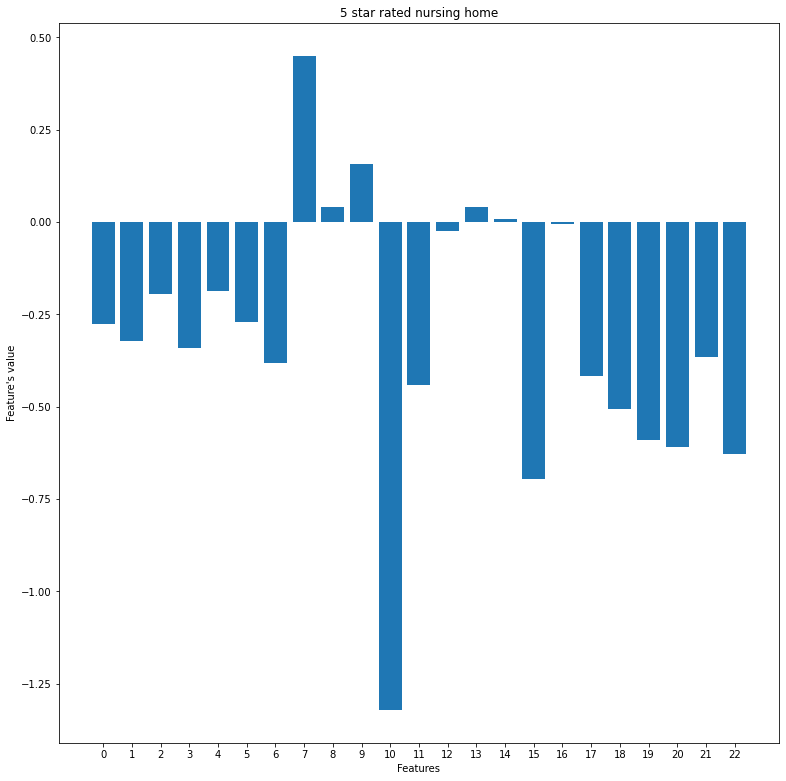

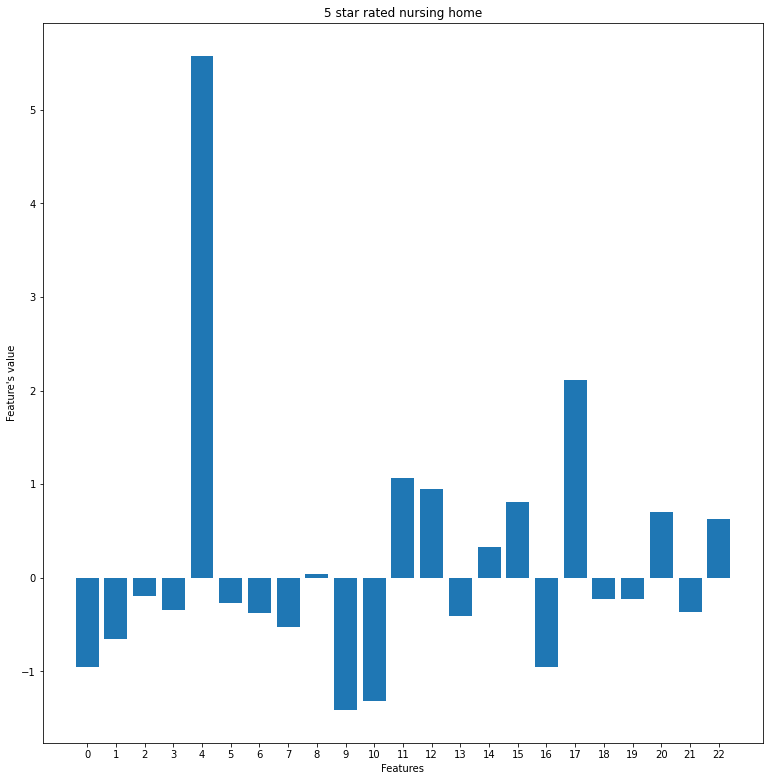

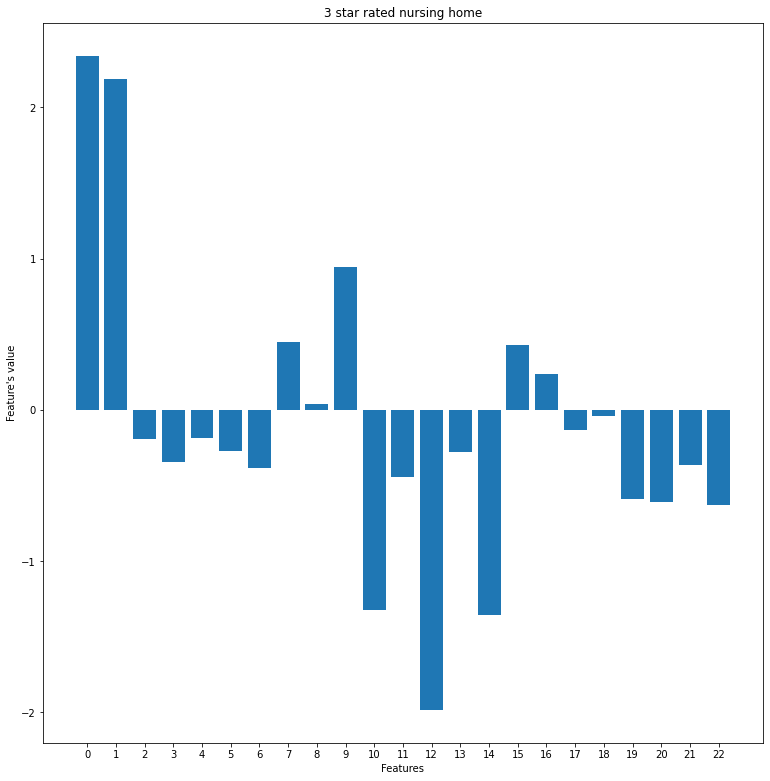

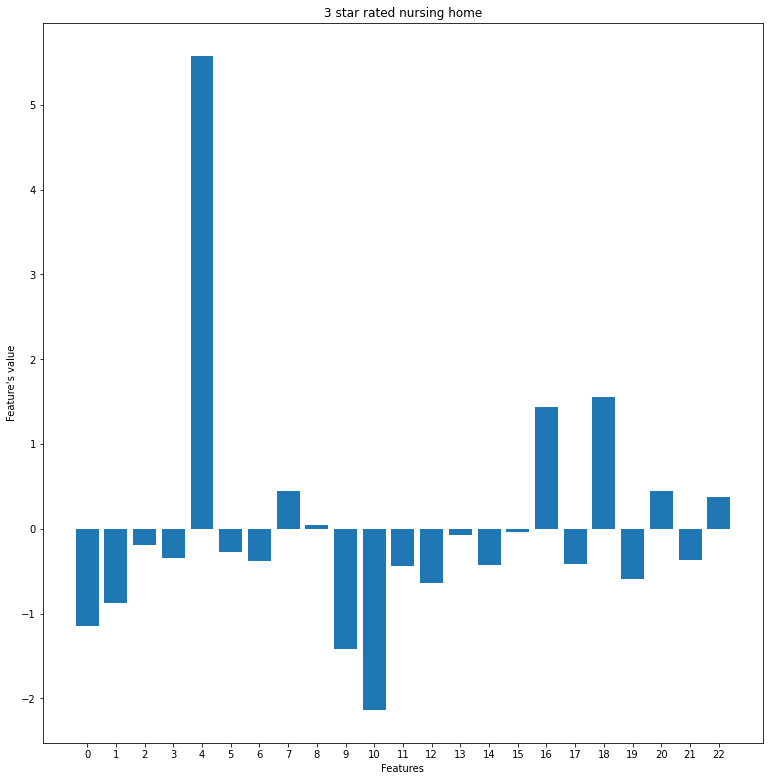

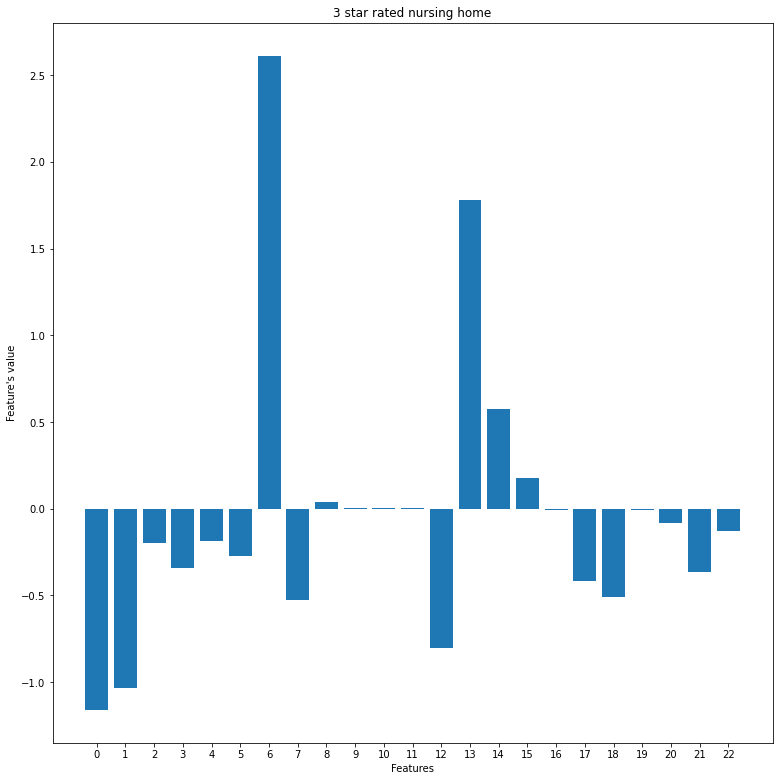

In [46]:
for i in range(9):
    fig=plt.figure(figsize=(10,10))
    axes=fig.add_axes([1,1,1,1])
    axes.bar(columns,x_train[graph_indexes[i]])
    plt.xticks(columns)
    plt.tight_layout()
    if i==0 or i==1 or i==2:
        axes.set_title("1 star rated nursing home")
    elif i==4 or i==4 or i==5:
        axes.set_title("5 star rated nursing home")
    else:
        axes.set_title("3 star rated nursing home")
    plt.xlabel("Features")
    plt.ylabel("Feature's value")
    plt.show()

Column names are too big to fit on the graph properly. Compromise with numbers

In [47]:
labels=[]
for k in reco_system_data.columns:
    if k!='provider_name' and k!='overall_rating':
        labels.append(k + '                                                                                              ')

In [48]:
plot_labels=dict(zip(columns,labels))
print(plot_labels)

{0: 'number_of_certified_beds                                                                                              ', 1: 'average_number_of_residents_per_day                                                                                              ', 2: 'provider_resides_in_hospital                                                                                              ', 3: 'continuing_care_retirement_community                                                                                              ', 4: 'special_focus_status                                                                                              ', 5: 'abuse_icon                                                                                              ', 6: 'most_recent_health_inspection_more_than_2_years_ago                                                                                              ', 7: 'with_a_resident_and_family_council                                                  